**Importing the required LIbraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msn
import sklearn

Reading the csv file

In [2]:
df=pd.read_csv("/content/Iris_flower.csv")

Checking the basic info of the data set

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Dropping the unwanted column

In [4]:
df=df.drop(columns="Id")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Checking the top 5 rows by default

In [6]:
df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

Checking the each category of counts in the target variable

In [7]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Checking the duplicates

In [8]:
df.duplicated().sum()

np.int64(3)

Dropping the duplicates

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(147, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  147 non-null    float64
 1   SepalWidthCm   147 non-null    float64
 2   PetalLengthCm  147 non-null    float64
 3   PetalWidthCm   147 non-null    float64
 4   Species        147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


Selecting the target variable and predictors variable

In [12]:
y=df["Species"]
X=df.drop(columns=["Species"])

Checking the shape of the predictors and target columns

In [13]:
X.shape

(147, 4)

In [14]:
y.shape

(147,)

Splitting the data into train and test data

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(117, 4)
(30, 4)
(117,)
(30,)


In [17]:
X_train.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
121            5.6           2.8            4.9           2.0
2              4.7           3.2            1.3           0.2
41             4.5           2.3            1.3           0.3
109            7.2           3.6            6.1           2.5
90             5.5           2.6            4.4           1.2

Apply Min Max Scaler

In [18]:
# Min Max Scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_norm=scaler.fit_transform(X_train)
X_test_norm=scaler.transform(X_test)

In [19]:
X_train.shape

(117, 4)

In [20]:
X_test.shape

(30, 4)

Converting to Data frame

In [21]:
X_train_norm=pd.DataFrame(X_train_norm,columns=X_train.columns)
X_test_norm=pd.DataFrame(X_test_norm,columns=X_test.columns)

Checking the type of x_train_norm

In [22]:
type(X_train_norm)

pandas.core.frame.DataFrame

In [23]:
X_train_norm.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0       0.361111      0.272727       0.661017      0.791667
1       0.111111      0.454545       0.050847      0.041667
2       0.055556      0.045455       0.050847      0.083333
3       0.805556      0.636364       0.864407      1.000000
4       0.333333      0.181818       0.576271      0.458333

Creating a KDE plot

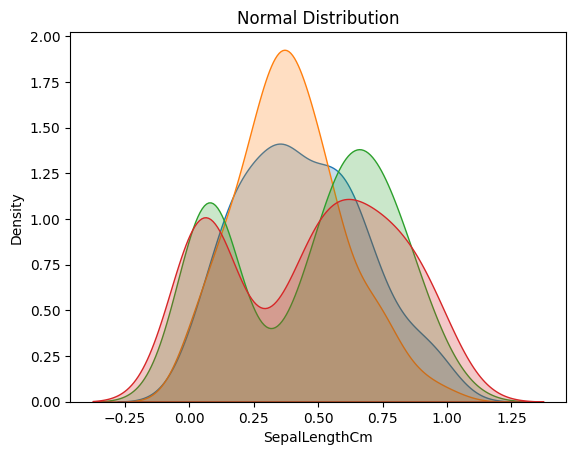

In [24]:
sns.kdeplot(X_train_norm,x="SepalLengthCm",fill=True)
sns.kdeplot(X_train_norm,x="SepalWidthCm", fill=True)
sns.kdeplot(X_train_norm,x="PetalLengthCm", fill=True)
sns.kdeplot(X_train_norm,x="PetalWidthCm", fill=True)
plt.title("Normal Distribution")
plt.show()

Create a KDE plot with original data

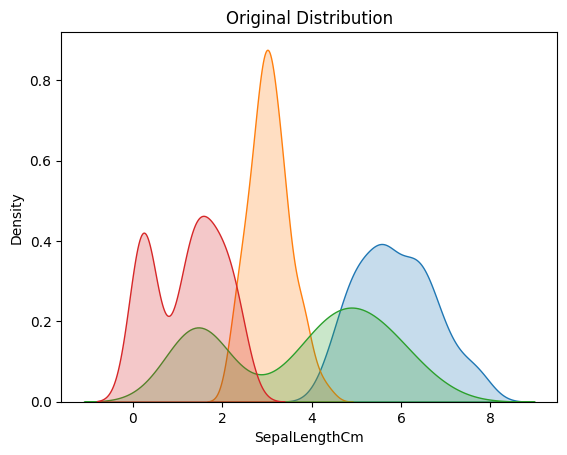

In [25]:
sns.kdeplot(X_train,x="SepalLengthCm", fill=True)
sns.kdeplot(X_train,x="SepalWidthCm", fill=True)
sns.kdeplot(X_train,x="PetalLengthCm", fill=True)
sns.kdeplot(X_train,x="PetalWidthCm", fill=True)
plt.title("Original Distribution")
plt.show()

Applying Standardization

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_stand=scaler.fit_transform(X_train)
X_test_stand=scaler.transform(X_test)

In [27]:
X_train_stand=pd.DataFrame(X_train_stand,columns=X_train.columns)
X_test_stand=pd.DataFrame(X_test_stand,columns=X_test.columns)
X_train_stand.head()


SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      -0.324278     -0.582042       0.613562      1.004385
1      -1.368514      0.299497      -1.388238     -1.325169
2      -1.600567     -1.683965      -1.388238     -1.195750
3       1.532141      1.181036       1.280829      1.651484
4      -0.440305     -1.022811       0.335534     -0.030972

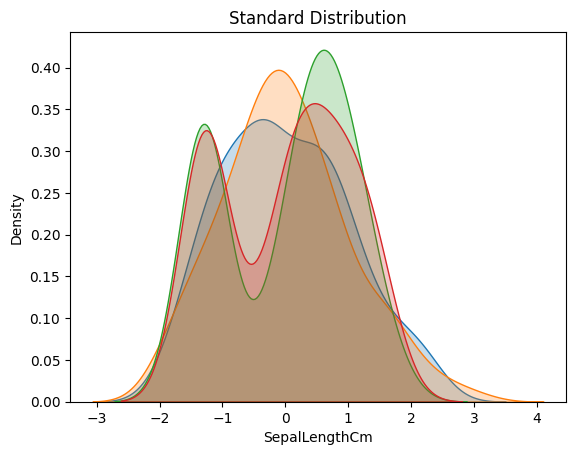

In [28]:
sns.kdeplot(X_train_stand,x="SepalLengthCm",fill=True)
sns.kdeplot(X_train_stand,x="SepalWidthCm", fill=True)
sns.kdeplot(X_train_stand,x="PetalLengthCm", fill=True)
sns.kdeplot(X_train_stand,x="PetalWidthCm", fill=True)
plt.title("Standard Distribution")
plt.show()

Checking the mean and std

In [29]:
X_train_stand["SepalLengthCm"].mean()

np.float64(5.674473236973022e-16)

In [30]:
X_train_stand["SepalLengthCm"].std()

1.0043010951179792

Robust Scaler

In [31]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_robust=scaler.fit_transform(X_train)
X_test_robust=scaler.transform(X_test)

In [32]:
X_train_robust=pd.DataFrame(X_train_robust,columns=X_train.columns)
X_test_robust=pd.DataFrame(X_test_robust,columns=X_test.columns)

In [33]:
X_train_robust.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      -0.153846     -0.333333       0.142857      0.466667
1      -0.846154      0.333333      -0.885714     -0.733333
2      -1.000000     -1.166667      -0.885714     -0.666667
3       1.076923      1.000000       0.485714      0.800000
4      -0.230769     -0.666667       0.000000     -0.066667

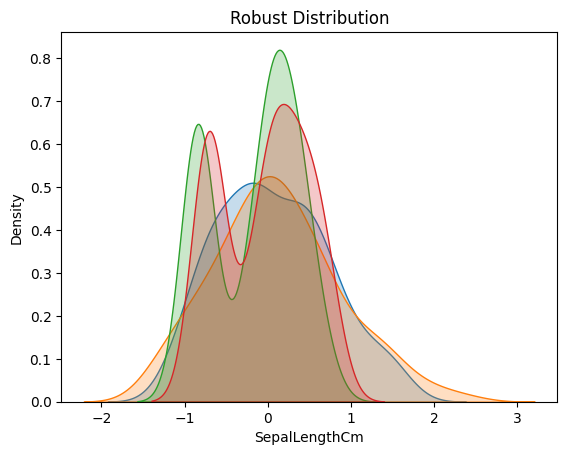

In [34]:
sns.kdeplot(X_train_robust,x="SepalLengthCm",fill=True)
sns.kdeplot(X_train_robust,x="SepalWidthCm", fill=True)
sns.kdeplot(X_train_robust,x="PetalLengthCm", fill=True)
sns.kdeplot(X_train_robust,x="PetalWidthCm", fill=True)
plt.title("Robust Distribution")
plt.show()

In [35]:
# Observations : In robust distribution the area under the curve is more when compared to normal and std distribution